### 데이터 이해 & EDA (마케팅 타깃 관점)

이번 회차의 목표는 모델링이 아니라 관찰과 비교입니다.  
우리는 “대출을 할 고객을 맞히는 것”보다,  
“대출을 선택하게 만든 생활·소비·이동 패턴을 이해하고 설명”하는 데 집중합니다.

#### 오늘의 EDA 흐름
1) 타깃(y) 분포 확인 (클래스 불균형)  
2) 데이터 품질 점검 (결측치/기초 통계)  
3) 그룹 비교 EDA (대출자 vs 비대출자)
- 인구·가구 특성
- 자산·소득 구조
- 소비 패턴
- 이동·활동성 지표  
4) 가설 문장 3~5개로 정리


---

#### 데이터 출처 (서울빅데이터캠퍼스)

- https://bigdata.seoul.go.kr/data/selectSampleData.do?r_id=P213&sample_data_seq=331

#### 데이터 설명서
- 빅데이터_캠퍼스_데이터_설명서.pdf
- 177P ~ 179 페이지 참조

---

### 0. 환경 설정 (Colab)
- 한글 폰트 설정을 통해 그래프에서 한글이 깨지지 않도록 합니다.

In [5]:
# 실행 결과 출력에 NanumGothic 존재 확인 필수
!apt-get update -qq
!apt-get -qq install -y fonts-nanum
!fc-list | grep -i nanum | head -n 20

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGo

##### 하단 코드 실행시 런타임 자동 재시작

In [ ]:
!f# (Colab) 한글 폰트 설정: 그래프 제목/라벨 깨짐 방지
!apt-get update -qq
!apt-get -qq install -y fonts-nanum
import os
os.kill(os.getpid(),9)

/bin/bash: -c: line 1: syntax error near unexpected token `Colab'
/bin/bash: -c: line 1: `f# (Colab) 한글 폰트 설정: 그래프 제목/라벨 깨짐 방지'
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


##### 한글 설정

In [1]:
# (Colab) 한글 폰트 설정: 그래프 제목/라벨 깨짐 방지
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

font_prop = fm.FontProperties(fname = font_path).get_name()
print(font_prop)

plt.rcParams['font.family'] = font_prop
plt.rcParams['axes.unicode_minus'] = False


NanumGothic


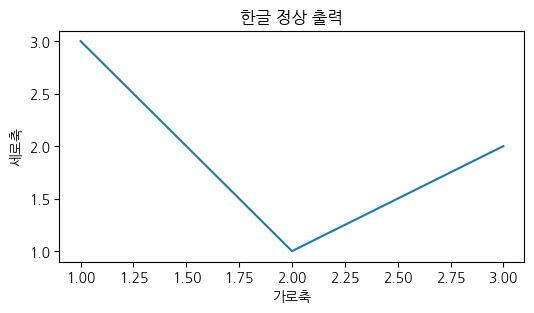

In [2]:
# 코드 실행시 한글 정상출력 확인
# 만약 정상실행이 되지 않는다면 최상단부터 다시 시작
plt.figure(figsize=(6,3))
plt.title("한글 정상 출력")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.plot([1,2,3],[3,1,2])
plt.show()

### 1. 라이브러리 & 데이터 로드

In [3]:
import pandas as pd
import numpy as np

DATA_PATH = "서울 시민의 소비 및 이동 패턴 재현 데이터.csv"
df = pd.read_csv(DATA_PATH, encoding="utf-8")
df.shape


(1000, 103)

In [4]:
df

,Unnamed: 0,자치구명,생년월일,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,평균_문자대상자수,평균_통화대상자수,평균_통화량,...,3개월내_탑승정류장수,평일_이동_총횟수,휴일_이동_총횟수,평일_총이동거리,평일_이동속도_평균,휴일_총이동거리,휴일_이동속도_평균,택시이용_이동횟수,네비게이션이용_이동횟수,지하철_이동일수
0,0,강동구,1978,남,3,0,420,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,도봉구,1943,남,2,0,420,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,동작구,1956,남,2,0,420,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,동대문구,1979,여,2,0,420,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,서초구,1941,여,0,0,420,28.0,6.0,91.0,...,0,20.0,7.0,310.0,31.0,470.0,39.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,서초구,1946,남,1,0,510,NaN,NaN,NaN,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,강남구,1964,남,0,0,440,120.0,45.0,1000.0,...,0,160.0,54.0,14000.0,48.0,5700.0,79.0,23.0,100.0,150.0
997,997,구로구,1965,남,0,0,510,76.0,15.0,160.0,...,3,150.0,29.0,4700.0,30.0,2900.0,39.0,84.0,38.0,190.0
998,998,마포구,1982,남,3,1,510,NaN,NaN,NaN,...,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 출력이 잘리므로 list로 변환하여 출력
list(df.columns)


['Unnamed: 0',
 '자치구명',
 '생년월일',
 '성별',
 '동일세대_학령기인구수',
 '동일세대_미취학아동수',
 '직업군',
 '평균_문자대상자수',
 '평균_통화대상자수',
 '평균_통화량',
 '세대주여부',
 '1인가구여부',
 '주택보유여부',
 '대출여부',
 '연체여부',
 '사업자여부',
 '동일세대_세대원_수',
 '추정연소득',
 '추정연소득_백분위',
 '총자산평가금액',
 '순자산평가금액',
 '차량보유',
 '총대출약정금액',
 '주택담보대출약정금액',
 '신용대출약정금액',
 '자동차대출약정금액',
 '카드소비금액',
 '신용카드소비금액',
 '체크카드소비금액',
 '일시불이용금액',
 '할부이용금액',
 '현금서비스이용금액',
 '해외카드이용금액',
 '신용카드기관수',
 '체크카드기관수',
 '카드사_최근1년_월평균_이용금액',
 '가맹점합산이용금액',
 '가맹점분류_이용비중1',
 '가맹점분류_이용비중2',
 '가맹점분류_이용비중3',
 '가맹점분류_이용비중4',
 '가맹점분류_이용비중5',
 '가맹점분류_이용비중6',
 '가맹점분류_이용비중7',
 '가맹점분류_이용비중8',
 '가맹점분류_이용비중9',
 '가맹점분류_이용비중10',
 '가맹점분류_이용비중11',
 '가맹점분류_이용비중12',
 '가맹점분류_이용비중13',
 '가맹점분류_이용비중14',
 '가맹점분류_이용비중15',
 '가맹점분류_이용비중16',
 '가맹점분류_이용비중17',
 '가맹점분류_이용비중18',
 '가맹점분류_이용비중19',
 '배달앱_이용금액',
 '제주도지역_이용금액',
 '해외여행_이용금액',
 '마케팅_슈퍼마켓_이용금액',
 '마케팅_편의점_이용금액',
 '마케팅_온라인쇼핑_이용금액',
 '마케팅_소셜커머스_이용금액',
 '온라인_카드사용_금액',
 '온라인_카드사용_건수',
 '오프라인_카드사용_금액',
 '오프라인_카드사용_건수',
 '주중_소비비중',
 '3개월내_승인건수비중1',
 '3개월내_승인건수비중2',
 '3개월내_

In [6]:
df["대출여부"]

,대출여부
0,0
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,1


### 2. 타깃(y) 분포 확인

대출여부(y)가 얼마나 분포한지 확인합니다.  

같은 조건에서도 왜 어떤 사람은 대출을 선택했고,
어떤 사람은 선택하지 않았을까?

이 둘을 가르는 생활·소비·이동 패턴은 무엇일까?


In [ ]:
# Pandas DataFrame에서 특정 컬럼 값의 빈도수를 계산하는 기능
# df["대출여부"] : DataFrame df에서 "대출여부"라는 컬럼(Series)을 선택
# .value_counts() : 해당 Series에서 각 값이 몇 번 등장했는지(빈도)를 세는 함수, 기본적으로 NaN 값은 제외하고 계산
# dropna=False : NaN도 함께 센다. 즉, 결측치(빈 값)가 몇 개 있는지도 보고 싶을 때 사용한다.

In [7]:
df["대출여부"].value_counts(dropna=False)

,count
대출여부,
1,530
0,470


In [ ]:
# - 타깃 변수 y(대출여부)의 분포를 계산하고, 막대그래프로 시각화
# y.value_counts() : Series y에 있는 각 값이 몇 번 등장하는지 계산
# .sort_index() : 인덱스 기준으로 정렬,  특히 0, 1처럼 클래스 라벨이 숫자일 때 → 그래프 순서를 일관되게 유지하기 위해 자주 사용
# counts.sum() :  전체 데이터 개수
# counts / counts.sum() : 각 클래스의 비율(확률) 계산
# .round(4) : 소수점 4자리까지 반올림
# fig = plt.figure() : 새로운 그래프 캔버스(Figure) 생성, 이후 그려질 그래프의 기반
# 막대그래프(bar chart) 그리기 : plt.bar(counts.index.astype(str), counts.values)
# counts.index : x축: 클래스 라벨 (예: 0, 1)
# .astype(str) : 숫자를 문자열로 변환,  x축 라벨 깨짐 / 자동 정렬 문제 방지
#  counts.values :y축: 각 클래스의 데이터 개수
# 그래프 꾸미기 : plt.title("y=대출여부 분포 (count)"): 제목: 대출여부 분포, plt.ylabel("count"): y축: 개수

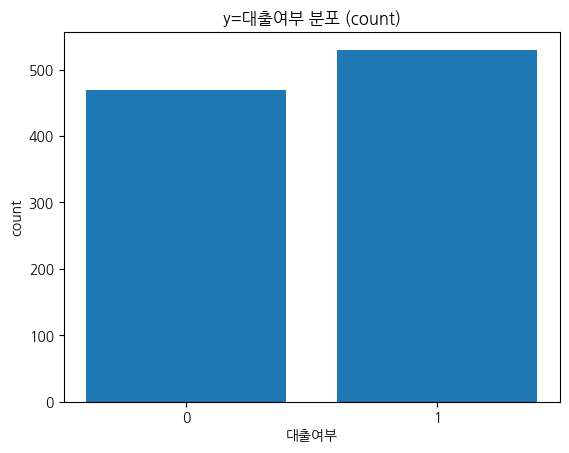

(대출여부
 0    470
 1    530
 Name: count, dtype: int64,
 대출여부
 0    0.47
 1    0.53
 Name: count, dtype: float64)

In [8]:
y = df["대출여부"]

counts = y.value_counts().sort_index()
ratio = (counts / counts.sum()).round(4)

fig = plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.title("y=대출여부 분포 (count)")
plt.xlabel("대출여부")
plt.ylabel("count")
plt.show()

counts, ratio


#### 1차 점검

> “대출보유자의 분포를 확인하다.
> 특정 소수의 행동이 아니라,많은 사람들이 실제로 고민하고 선택하는 행동이다.”


### 3. 데이터 품질 점검 (결측치 / 기초 통계)

EDA는 모델링 이전에 “데이터의 신뢰와 전반적인 상태를 파악한다. 과정이다.
- 결측치가 많은 컬럼이 확인하고 처리여부를 결정한다.
- 숫자형 컬럼의 범위가 적절인지를 먼저 체크한다.


In [ ]:
# DataFrame 전체 컬럼의 결측치(결손값) 비율을 계산하고, 결측치가 많은 컬럼부터 확인하기 위한 전처리용 코드
# df.isna() : DataFrame df에서 결측치(NaN) 여부를 True / False로 반환
# .mean() : True → 1, False → 0 으로 계산됨, 따라서 각 컬럼의 평균 = 결측치 비율  # 지하철이동일수    0.536   # 53.6% 결측
# .sort_values(ascending=False) : 결측치 비율이 높은 컬럼부터 내림차순 정렬, -- 어떤 컬럼이 가장 문제가 되는지 한눈에 확인 가능
# missing_rate.head(20) : 결측치 비율 상위 20개 컬럼만 출력

In [9]:
missing_rate = df.isna().mean().sort_values(ascending=False)
missing_rate.head(20)


,0
지하철_이동일수,0.536
택시이용_이동횟수,0.536
휴일_이동속도_평균,0.536
평일_이동속도_평균,0.536
평균_통화량,0.535
평균_통화대상자수,0.535
평균_문자대상자수,0.535
휴일_이동_총횟수,0.535
평일_총이동거리,0.535
네비게이션이용_이동횟수,0.534


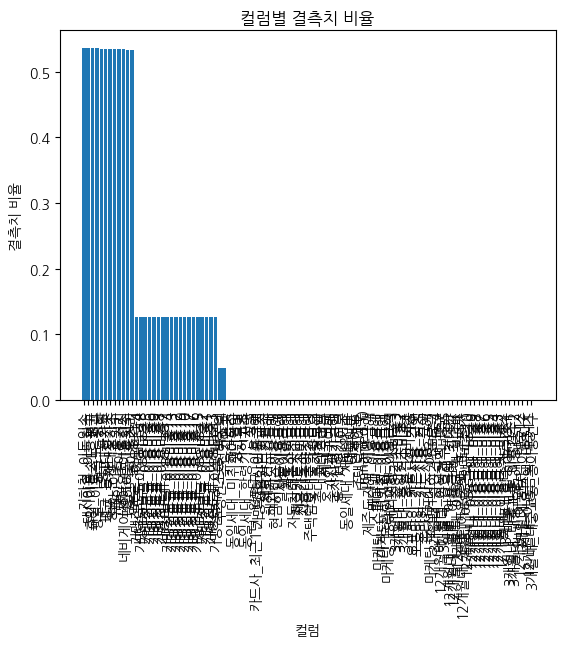

In [10]:
import matplotlib.pyplot as plt

# 컬럼별 결측치 비율 계산
missing_rate = df.isna().mean().sort_values(ascending=False)

# 막대그래프
plt.figure()
plt.bar(missing_rate.index, missing_rate.values)
plt.xticks(rotation=90)
plt.title("컬럼별 결측치 비율")
plt.xlabel("컬럼")
plt.ylabel("결측치 비율")
plt.show()


In [11]:
# 결측치 비율이 30% 이상인 컬럼만
missing_rate = df.isna().mean()

high_missing_cols = missing_rate[missing_rate >= 0.3].sort_values(ascending=False)

high_missing_cols


,0
휴일_이동속도_평균,0.536
택시이용_이동횟수,0.536
지하철_이동일수,0.536
평일_이동속도_평균,0.536
휴일_이동_총횟수,0.535
평균_통화량,0.535
평균_통화대상자수,0.535
평균_문자대상자수,0.535
평일_총이동거리,0.535
네비게이션이용_이동횟수,0.534


In [12]:
# 결측치가 많은 상위 10개 컬럼
missing_rate = df.isna().mean().sort_values(ascending=False)

missing_rate.head(10)


,0
지하철_이동일수,0.536
택시이용_이동횟수,0.536
휴일_이동속도_평균,0.536
평일_이동속도_평균,0.536
평균_통화량,0.535
평균_통화대상자수,0.535
평균_문자대상자수,0.535
휴일_이동_총횟수,0.535
평일_총이동거리,0.535
네비게이션이용_이동횟수,0.534


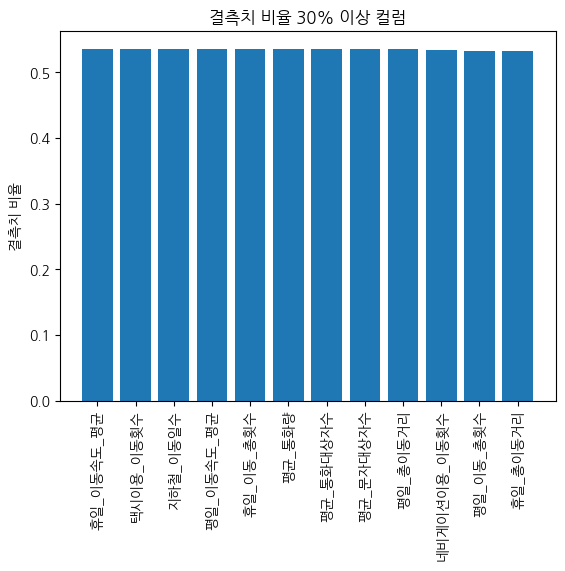

In [13]:
# 결측치 많은 컬럼만 시각화 (bar plot) :  예: 결측치 비율 ≥ 30% 컬럼만
high_missing = df.isna().mean()
high_missing = high_missing[high_missing >= 0.3].sort_values(ascending=False)

plt.figure()
plt.bar(high_missing.index, high_missing.values)
plt.xticks(rotation=90)
plt.title("결측치 비율 30% 이상 컬럼")
plt.ylabel("결측치 비율")
plt.show()




> 이 코드의 목적 (실무 / 머신러닝 관점)
✔️ 1. 결측치 많은 컬럼 제거 후보
✔️ 2. 결측치 대체 전략 수립 : 수치형: 평균 / 중앙값 / 모델 기반
✔️ 3. 모델 성능 저하 사전 방지 : 이동과 관련된 결측이 많다.

이는 라이프스타일적 특성일까 아니면 단순한 결측치일까?




가설을 검증하기 위해 '이동'과 관련된 변수들을 묶어본다.

In [14]:
# 이동(모빌리티) 관련 변수들의 컬럼명을 하나의 리스트로 정리하는 코드
# mobility_cols 변수 : 문자열(str)로 된 컬럼명들의 리스트(list), DataFrame의 실제 컬럼 이름과 1:1로 대응됨

In [15]:
mobility_cols = [
    "택시이용_이동횟수",
    "지하철_이동일수",
    "평일_이동_총횟수",
    "휴일_이동_총횟수",
    "평일_총이동거리",
    "휴일_총이동거리",
    "평일_이동속도_평균",
    "휴일_이동속도_평균",
]
mobility_cols


['택시이용_이동횟수',
 '지하철_이동일수',
 '평일_이동_총횟수',
 '휴일_이동_총횟수',
 '평일_총이동거리',
 '휴일_총이동거리',
 '평일_이동속도_평균',
 '휴일_이동속도_평균']

In [16]:
type(mobility_cols)
# list


list

대출그룹 vs 비대출그룹 사이 이동관련 변수 결측치 차이를 살펴본다.

In [ ]:
# 타깃 변수(대출여부)에 따라 이동(mobility) 변수들의 결측치 비율이 어떻게 다른지를 분석하기 위한 코드
# df.groupby("대출여부") : DataFrame을 대출여부 값별로 그룹화, 예:대출여부 = 0 (비대출), 대출여부 = 1 (대출)
# [mobility_cols] : 그룹화된 데이터 중에서 이동 관련 컬럼들만 선택
# .apply(lambda x: x.isna().mean()) : ✔️ 그룹별로 수행되는 작업 : x는 하나의 그룹에 해당하는 DataFrame
# x.isna() : → 결측치 여부(True/False)
# .mean() : → 컬럼별 결측치 비율, 즉, 각 대출여부 그룹 내에서, 각 이동 컬럼의 결측치 비율 계산
# .T (전치, Transpose) : 행 ↔ 열을 뒤집음,  보기 쉽게 컬럼 = 대출여부, 행 = 변수 구조로 변경

In [17]:
missing_by_target = (
    df
    .groupby("대출여부")[mobility_cols]
    .apply(lambda x: x.isna().mean())
    .T
)

missing_by_target


대출여부,0,1
택시이용_이동횟수,0.585106,0.492453
지하철_이동일수,0.585106,0.492453
평일_이동_총횟수,0.580851,0.490566
휴일_이동_총횟수,0.582979,0.492453
평일_총이동거리,0.582979,0.492453
휴일_총이동거리,0.578723,0.492453
평일_이동속도_평균,0.585106,0.492453
휴일_이동속도_평균,0.585106,0.492453


→ 비대출 고객 : 이동 데이터가 충분히 쌓이지 않음
- 중요한 건 원인보다 영향입니다.
> 실제로 대출을 진행한 그룹이 대출을 진행하지 않은 그룹보다 많이 택씨이동, 지하철이동, 평일, 휴일 이동이 많은
경향이 보인다.(상대적으로 결측치가 적음.)



In [ ]:
missing_by_target = (
    df
    .groupby("대출여부")[mobility_cols]
    .apply(lambda g: g.isna().mean())
    .T
)
df

,Unnamed: 0,자치구명,생년월일,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,평균_문자대상자수,평균_통화대상자수,평균_통화량,...,3개월내_탑승정류장수,평일_이동_총횟수,휴일_이동_총횟수,평일_총이동거리,평일_이동속도_평균,휴일_총이동거리,휴일_이동속도_평균,택시이용_이동횟수,네비게이션이용_이동횟수,지하철_이동일수
0,0,강동구,1978,남,3,0,420,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,도봉구,1943,남,2,0,420,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,동작구,1956,남,2,0,420,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,동대문구,1979,여,2,0,420,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,서초구,1941,여,0,0,420,28.0,6.0,91.0,...,0,20.0,7.0,310.0,31.0,470.0,39.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,서초구,1946,남,1,0,510,NaN,NaN,NaN,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,996,강남구,1964,남,0,0,440,120.0,45.0,1000.0,...,0,160.0,54.0,14000.0,48.0,5700.0,79.0,23.0,100.0,150.0
997,997,구로구,1965,남,0,0,510,76.0,15.0,160.0,...,3,150.0,29.0,4700.0,30.0,2900.0,39.0,84.0,38.0,190.0
998,998,마포구,1982,남,3,1,510,NaN,NaN,NaN,...,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. DataFrame의 컬럼을 숫자형 / 범주형(비숫자형)으로 분리하는 전처리 단계

In [18]:
# 숫자형 컬럼 분리
# num_cols = df.select_dtypes(include="number").columns.tolist()
# df.select_dtypes(include="number") : 데이터 타입이 숫자형(int, float 등) 인 컬럼만 선택
#  .columns : 선택된 DataFrame의 컬럼 이름 반환
# .tolist() : 컬럼 이름을 파이썬 리스트로 변환

num_cols = df.select_dtypes(include="number").columns.tolist()

# 범주형(숫자가 아닌 컬럼) 분리
cat_cols = [c for c in df.columns if c not in num_cols]

# 숫자형 컬럼 수, 범주형 컬럼 수 확인 : 데이터 구조를 빠르게 파악하는 용도
print(len(num_cols), len(cat_cols))
print()
print(num_cols[:10])
print(cat_cols[:10])


100 3

['Unnamed: 0', '생년월일', '동일세대_학령기인구수', '동일세대_미취학아동수', '직업군', '평균_문자대상자수', '평균_통화대상자수', '평균_통화량', '1인가구여부', '주택보유여부']
['자치구명', '성별', '세대주여부']


### (참고) 라벨 누설 변수 분리

시차 선후행 관계에 따르는 Data Leakage(데이터 누수) 문제를 제거하기 위함

→ 22,23회차 EDA(마케팅 관점 설명)에서는 제외/분리해서 다룬다.

In [19]:
# (중요) 라벨 누설(leakage) 가능성이 있는 변수는 EDA/모델링에서 분리해서 다룬다.
# 예: '총대출약정금액'은 대출한 사람(y=1)에게만 값이 존재하므로, y를 사실상 직접 설명하는 문제가 발생한다..
leak_cols = ["총대출약정금액", "주택담보대출약정금액", "신용대출약정금액"]
num_cols_clean = [c for c in num_cols if c not in leak_cols]


In [20]:
# 전체 데이터에 대한 기술통계
df[num_cols].describe().T.head(20)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500000,288.819436,0.0,249.75,499.5,749.25,999.0
생년월일,1000.0,1963.452000,14.027989,1927.0,1952.00,1965.0,1975.00,1998.0
동일세대_학령기인구수,1000.0,1.265000,1.104534,0.0,0.00,1.0,2.00,4.0
동일세대_미취학아동수,1000.0,0.454000,0.787721,0.0,0.00,0.0,1.00,4.0
직업군,1000.0,575.510000,212.251244,410.0,420.00,440.0,910.00,910.0
평균_문자대상자수,465.0,52.221505,39.663188,0.0,24.00,41.0,71.00,210.0
평균_통화대상자수,465.0,18.604301,15.607883,0.0,9.00,14.0,23.00,86.0
평균_통화량,465.0,261.486022,291.971908,0.0,65.00,160.0,340.00,2000.0
1인가구여부,1000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
주택보유여부,1000.0,0.427000,0.494890,0.0,0.00,0.0,1.00,1.0


In [21]:
# 대출그룹과 비대출그룹 별  기초통계량
# “대출자와 비대출자의 수치적 특성이 어떻게 다른가?”
# df.groupby("대출여부") : DataFrame을 대출여부 값(0 / 1) 기준으로 그룹화
# [num_cols] : 전체 컬럼 중 숫자형 컬럼만 선택 ,  범주형 컬럼이 섞여서 집계 오류가 나는 것을 방지
# .agg(["mean", "median"]) : 각 숫자형 변수에 대해 두 가지 통계량 계산 , mean : 평균 (이상치에 민감) , median : 중앙값 (이상치에 강건)
# .T (전치) : 행과 열을 뒤집어 비교하기 쉬운 형태로 변환
# summary.head(20) : 20개만 미리보기, 각각 10개씩

In [22]:
summary = (
    df
    .groupby("대출여부")[num_cols]
    .agg(["mean", "median"])
    .T
)

summary.head(20)


대출여부                          0            1
Unnamed: 0  mean     484.295745   512.983019
            median   478.500000   509.500000
생년월일        mean    1959.187234  1967.233962
            median  1956.000000  1970.000000
동일세대_학령기인구수 mean       1.189362     1.332075
            median     1.000000     1.000000
동일세대_미취학아동수 mean       0.451064     0.456604
            median     0.000000     0.000000
직업군         mean     602.191489   551.849057
            median   440.000000   440.000000
평균_문자대상자수   mean      47.090909    56.026217
            median    35.500000    46.000000
평균_통화대상자수   mean      15.789744    20.637037
            median    12.000000    16.000000
평균_통화량      mean     221.282051   290.522222
            median   120.000000   180.000000
1인가구여부      mean       0.000000     0.000000
            median     0.000000     0.000000
주택보유여부      mean       0.436170     0.418868
            median     0.000000     0.000000

- 생년월일
  - 대출자가 상대적으로 젊다.
  - 대출은 고령 리스크가 아닌 상대적 '활동 연령대'의 선택
- 동일세대_학령기인구수
  - 중앙값이 동일함
  - 그러나! 평균에서 차이가 있음!
  - 이는 곧 대출자 중 학령기 자녀가 2명 이상인 가구가 더 많음

- 직업군
  - 숫자로 판단되었으나
  - 직업 코드기에 의미없는 분석
  - 해석에 주의!
  - (데이터 리터러시에 필요성)

- 통신활동 변수들
  - 평균_문자대상자수
  - 평균_통화대상자수
  - 평균_통화량
  - 모두 대출집단이 높음

- 1인가구여부
  - 완전 무의미
  - 이러한 데이터는 삭제해야함
  


힌트!

(1) 대출자는 더 젊고

(2) 더 많이 움직이고 더 많이 소통하며

(3) 가족 부담이 존재한다.

### 5. 그룹 비교 EDA: 대출자 vs 비대출자

이제부터는 모든 분석이 “그룹별 비교” 중심이다.

- 평균 한 줄로 끝내지 않고
- 분포(박스플롯/바이올린) + 요약 통계(중앙값/사분위)로 확인한다.

오늘은 아래 4개 영역을 순서대로 설펴본다.
1) 인구·가구 특성  
2) 소득·자산 구조  
3) 소비 패턴  
4) 이동·활동성 지표


In [23]:
# 대출여부(타깃 값)에 따라 데이터를 두 개의 하위 DataFrame으로 분리하고, 각 집단의 크기(행·열 수)를 확인
# df["대출여부"] == 0 : → 대출여부가 0인 행만 True,  Boolean indexing으로 비대출자 데이터만 선택
# .copy() : ✔️ 왜 쓰나? (중요),  원본 df와 완전히 독립된 DataFrame 생성,  SettingWithCopyWarning 방지 이후 전처리·수정 시 원본 훼손 방지 --> 실무에서는 거의 필수
# df1 = df[df["대출여부"] == 1].copy() : 대출자 집단만 따로 분리
# df0.shape, df1.shape : 각 DataFrame의 (행 수, 열 수) 반환 , 튜플 형태로 출력

In [24]:
df0 = df[df["대출여부"] == 0].copy()
df1 = df[df["대출여부"] == 1].copy()

df0.shape, df1.shape


((470, 103), (530, 103))

In [25]:
# 집단간 평균 차이가 가장 큰 순서대로 정렬
# 대출여부(타깃)에 따라 숫자형 변수들을 요약하고, 특히 평균 차이가 큰 변수들을 자동으로 찾아내기 위한 EDA .
# 실무에서 “어떤 수치형 피처가 대출 여부를 잘 구분하는가?” 를 빠르게 보는 데 매우 유용하다.

In [27]:
# 출력 형식 설정
# pandas에서 실수(float) 출력 형식을 설정,  소수점 없이, 천 단위 콤마 적용
pd.options.display.float_format = '{:,.0f}'.format

# 숫자형 데이터 요약통계 함수
# 타깃(y_col) 기준으로 숫자형 컬럼들의 기본 통계(count, mean, median, std) 를 한 번에 계산
def group_summary(df, y_col, cols):
    out = []   #결과 저장용 리스트
    for c in cols:   # 컬럼 하나씩 순회
        if c not in df.columns:   # 존재 여부 체크
            continue
        if not pd.api.types.is_numeric_dtype(df[c]):   # 숫자형 컬럼만 사용
            continue
        g = df.groupby(y_col)[c].agg(["count", "mean", "median", "std"]).reset_index()   # 그룹별 요약 통계 계산  count : 유효 데이터 수,mean : 평균,median : 중앙값,std : 표준편차
        g["feature"] = c  # 변수명 컬럼 추가 : 어떤 변수의 통계인지 표시
        out.append(g)  # 결과 누적
    return pd.concat(out, axis=0, ignore_index=True)  # 하나의 DataFrame으로 결합

# 평균 차이가 큰 변수 찾는 함수
def top_diff_by_mean(df, y_col, cols, topn=10):
    rows = []  # 결과 저장용 리스트
    for c in cols:   # 컬럼 순회 + 검증,  존재 여부, 숫자형 여부 체크 (앞 함수와 동일)
        if c not in df.columns:
            continue
        if not pd.api.types.is_numeric_dtype(df[c]):
            continue
        m = df.groupby(y_col)[c].mean()  # 그룹별 평균 계산
        if 0 in m.index and 1 in m.index:  # 두 클래스 모두 존재할 때만 계산
            rows.append((c, float(m[1] - m[0]), float(m[1]), float(m[0])))  #평균 차이 계산 , 양수: 대출보유자가 값이 큼, 음수: 비대출자가 값이 큼  # 결과 저장
    out = pd.DataFrame(rows, columns=["feature", "mean_diff(1-0)", "mean_y1", "mean_y0"])  # DataFrame 생성 + 정렬
    return out.sort_values("mean_diff(1-0)", ascending=False).head(topn)

top_diff_by_mean(df, "대출여부", num_cols, topn=15) # 함수 실행 , 숫자형 변수 중 대출자 − 비대출자 평균 차이가 큰 변수 TOP 15 출력


,feature,mean_diff(1-0),mean_y1,mean_y0
72,12개월내_월별_이용금액_최대값,"3,829,217","7,868,613","4,039,396"
33,가맹점합산이용금액,"1,404,062","3,336,862","1,932,800"
62,오프라인_카드사용_금액,"1,146,946","2,831,709","1,684,764"
70,12개월내_월별_이용금액_평균,"1,041,031","2,378,540","1,337,509"
71,12개월내_월별_이용금액_표준편차,"1,027,748","2,090,040","1,062,292"
60,온라인_카드사용_금액,"544,159","1,551,634","1,007,474"
73,12개월내_월별_이용금액_최소값,"339,473","829,128","489,655"
19,총대출약정금액,"166,330","166,330",0
20,주택담보대출약정금액,"97,027","97,027",0
21,신용대출약정금액,"37,731","37,731",0


힌트!
1) 카드·소비 금액 계열이 압도적이다.


> 즉, 대출자는 '소비 규모가 큰 사람'이다.

<br>

2) 소비의 '변동성'도 크다
  - 12개월내_월별_이용금액_표준편차가 상위권이다.


> 즉, 대출자는 소비가 일정하지 않고 변동성이 크다.

    ex) 가전, 여행, 교육, 이사 등이 이벤트로 발생했을 수 있다.

<br>

3) 온라인/배달/소셜커머스 사용이 많다.


> 즉, 대출자는 디지털 소비 채널에 익숙한 집단이다.
    ex) 비대면 금유 마케팅과 궁합이 좋다.






- “두 집단의 분포 차이, 이상치, 밀도 형태가 다른가?” 를 직관적으로 확인하는 목적
-  전처리 전 데이터 violin plot 시각화
- 두개 집단 바이올린 플롯 출력함수

In [29]:
# df : 원본 DataFrame
# y_col : 타깃 컬럼 (예: "대출여부")
# x_col : 비교할 숫자형 변수

def box_violin_compare(df, y_col, x_col):
    g0 = df[df[y_col] == 0][x_col].dropna()  # 타깃별 데이터 분리 + 결측 제거 : y=0, y=1 두 집단으로 분리, 해당 변수 x_col의 결측치(NaN)는 제거
    g1 = df[df[y_col] == 1][x_col].dropna()

    fig = plt.figure(figsize=(10, 4))  # 가로로 두 개 그래프를 배치하기 위해 넓은 Figure 생성

    plt.subplot(1, 2, 1)  # plt.subplot(행 개수, 열 개수, 위치 번호) --> 1행 2열 중 첫 번째 위치(왼쪽)
    plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)
    plt.title(f"Boxplot: {x_col}")
    plt.ylabel(x_col)

    plt.subplot(1, 2, 2)  #  Violin plot 1행 2열 중 두 번째 위치(오른쪽)
    plt.violinplot([g0.values, g1.values], showmeans=True, showextrema=True)  # Violin plot이 보여주는 것: 1번째 바이올린(위치 1) = g0 (y=0),2번째 바이올린(위치 2) = g1 (y=1),  데이터 분포의 밀도 형태 평균 위치 (showmeans=True),  최소·최대 (showextrema=True)
    plt.xticks([1, 2], ["y=0", "y=1"])  # 바이올린 플롯은 기본적으로 1번, 2번 위치에 그림이 생기는데 그 위치에 대해 x축 눈금을:1 → "y=0" 2 → "y=1" 로 바꿔주는 코드
    plt.title(f"Violin: {x_col}")  # 그래프 상단에 제목: f-string이라서 x_col 이름이 제목에 자동으로 들어간다.

    plt.tight_layout()  # 레이아웃 정리 + 출력 :  그래프 겹침 방지, 최종 시각화 출력
    plt.show()


### 5-1. 인구·가구 특성 비교

가구 구성 특성이 대출 여부에 따라 어떻게 다른가?” 를 한 번에 확인하는 목적

마케팅에서는 인구통계가 세그먼트 정의의 출발점 !!


/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


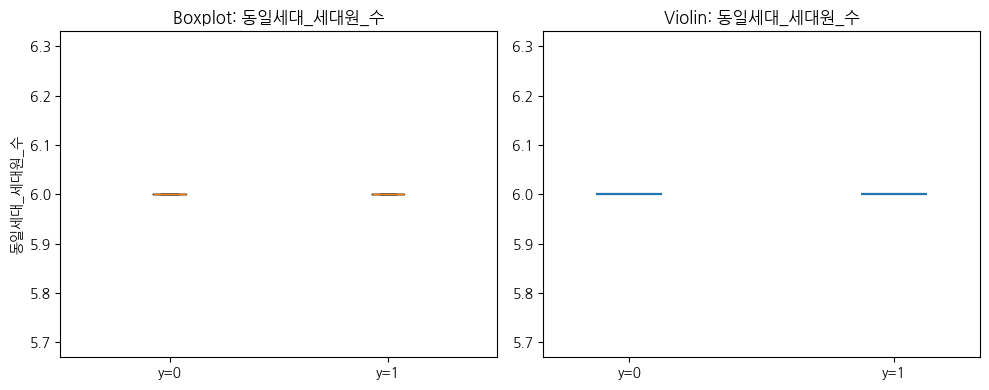

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


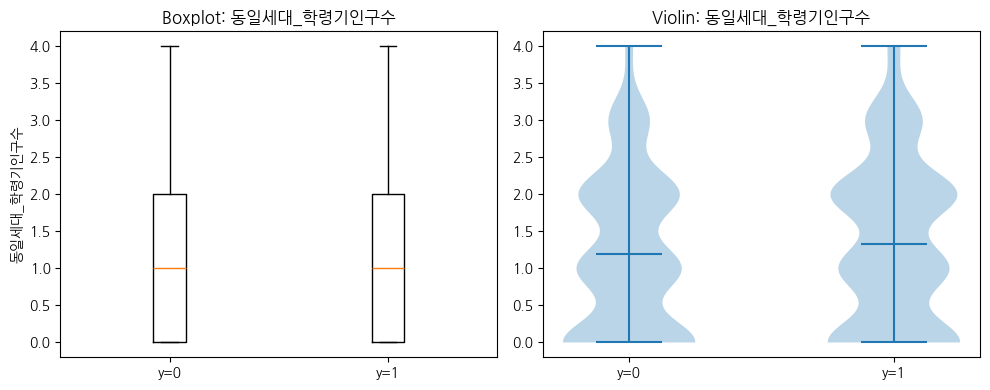

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


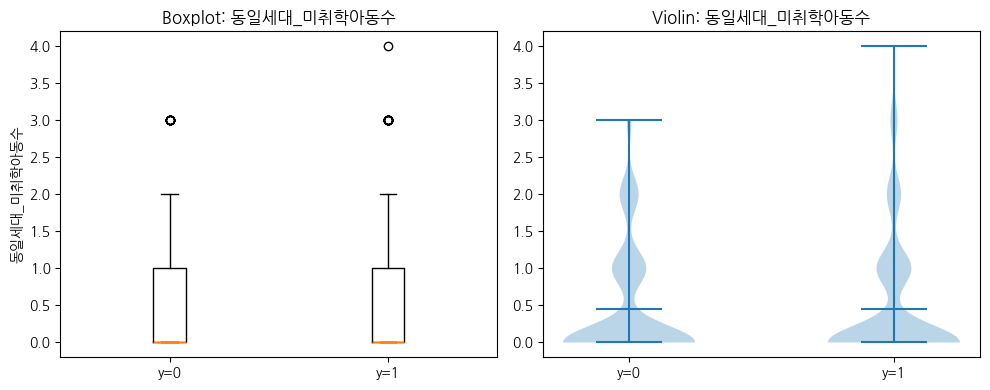

In [30]:
# 가구/인구 구조를 나타내는 변수 이름들을 리스트로 정의 : 모두 숫자형(count 성격) 변수
demo_cols = [
    "동일세대_세대원_수",
    "동일세대_학령기인구수",
    "동일세대_미취학아동수",
]

for c in demo_cols:   # 변수 하나씩 반복 (for 루프),   demo_cols에 들어 있는 컬럼명을 하나씩 꺼내서 변수 c에 할당
    if c in df.columns and pd.api.types.is_numeric_dtype(df[c]):   # 안전성 체크 (중요): 에러 방지용 가드 코드, c in df.columns: 해당 컬럼이 실제 DataFrame에 존재하는지 확인, pd.api.types.is_numeric_dtype(df[c]): 해당 컬럼이 숫자형 데이터인지 확인
        box_violin_compare(df, "대출여부", c)  # 시각화 함수 호출: df : 전체 데이터, "대출여부" : 타깃 (y축 그룹 기준), c : 현재 비교할 인구 변수


- 범주형 변수(category)별로 “대출일 확률(P(y=1))”을 계산하고, 확률이 높은 상위 범주만 막대그래프로 시각화하는 EDA용 함수 + 실행
- 전처리 전 데이터 barplot 시각화

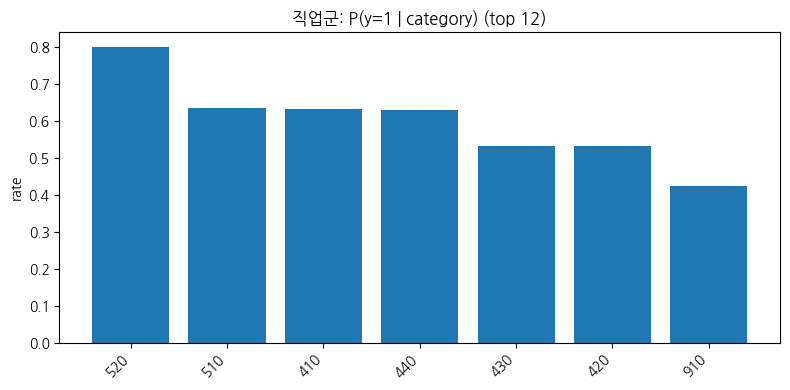

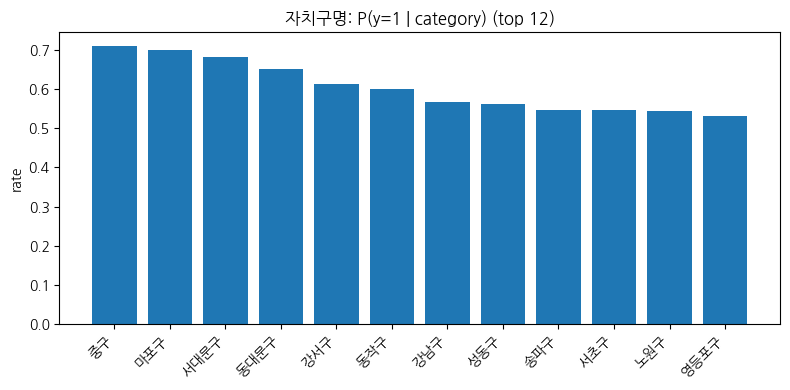

In [32]:
# 함수 정의: category_rate_bar
def category_rate_bar(df, y_col, cat_col, topn=10):   # cat_col:분석할 범주형 컬럼, topn:확률이 높은 상위 N개 범주만 표시
    tmp = df[[y_col, cat_col]].dropna()  # 필요한 컬럼만 선택 + 결측 제거
    ct = pd.crosstab(tmp[cat_col], tmp[y_col], normalize="index")  # 범주별 대출 확률 계산: pd.crosstab:행: cat_col의 각 범주,  열: y_col (0 / 1),  normalize="index": 행 기준 정규화, 즉, 각 범주 내에서 계산
    ct = ct.sort_values(by=1, ascending=False).head(topn) # 대출 확률 높은 순 정렬 + 상위 N개 선택 , by=1 → y=1 (대출)의 확률, 대출 비율이 높은 범주부터 정렬,  상위 topn개만 시각화

    fig = plt.figure(figsize=(8, 4)) # 막대그래프 그리기
    plt.bar(ct.index.astype(str), ct[1].values) # x축: 범주 이름,  y축: P(y=1 | category) 값
    plt.xticks(rotation=45, ha="right") # 그래프 꾸미기, 범주명이 길 수 있으므로 회전
    plt.title(f"{cat_col}: P(y=1 | category) (top {topn})")  # 제목에 변수명과 의미 명시
    plt.ylabel("rate")
    plt.tight_layout() # 겹침 방지
    plt.show()

# 함수 실행 부분:  "직업군", "자치구명" 두 범주형 변수에 대해 컬럼이 존재하면 각각 대출 확률 상위 12개 범주를 그래프로 출력
# 직업군 (410(대기업급여소득),420(일반급여소득),430(전문직급여소득), 440(대표),510(일반자영업), 520(전문직자영업),910(무직/기타))
for col in ["직업군", "자치구명"]:
    if col in df.columns:
        category_rate_bar(df, "대출여부", col, topn=12)


In [ ]:
# 이 코드로 얻는 인사이트
# 1. 범주형 변수의 분리력 확인 :  특정 직업군/지역에서 대출 확률이 유의하게 높은가?

# 2. 타깃 인코딩 후보 탐색 : 대출 확률이 높은 범주 → 강한 신호

# 3. 리스크 탐지 : 표본 수 적은 범주에서 확률이 튀는지 확인 필요

# 실무 주의사항 (중요)
# 1) 표본 수가 매우 적은 범주는 확률이 과대평가될 수 있음  → 최소 표본 수 필터 권장

# 2) 훈련/검증 분리 후 계산해야 타깃 누수 방지

### 5-2. 소득·자산 구조 비교

금융 마케팅에서 중요한 건 “소득이 높다/낮다” 한 줄이 아니라  
소득·자산의 분포/구조가 어떻게 다른지이다.


- 금융(finance) 관련 숫자형 변수들을 하나씩 순회하면서,각 변수에 대해 대출여부(0/1) 기준 분포를 Boxplot + Violin plot으로 비교 시각화하는 EDA

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


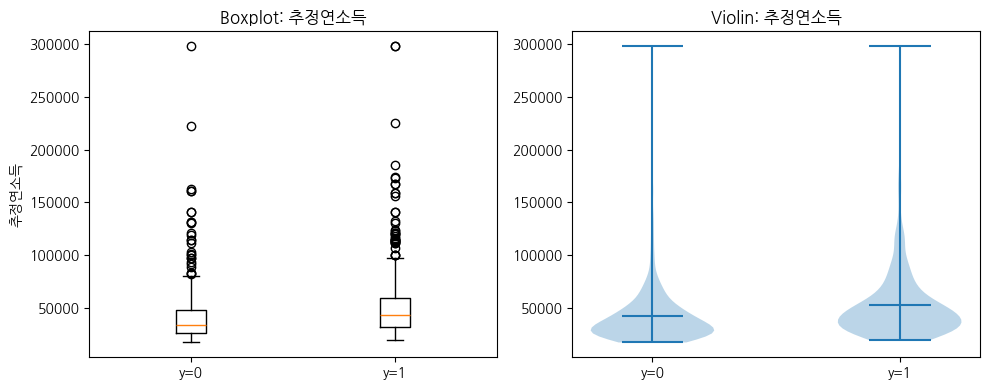

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


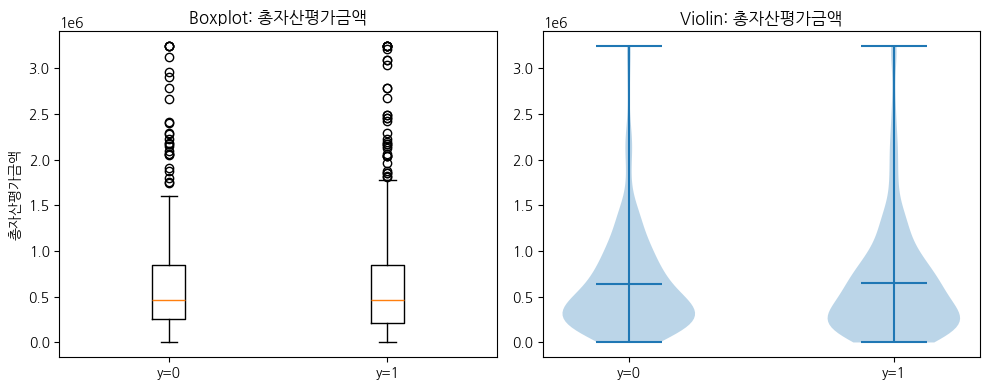

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


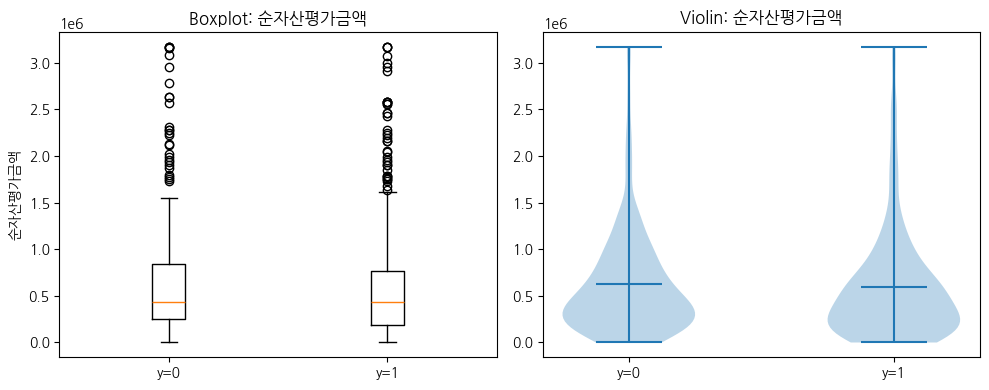

In [33]:
# finance_cols 리스트: 개인의 재무 규모를 나타내는 핵심 숫자형 변수들,  모두 금액 단위 → 분포 왜도·이상치 가능성 높음
finance_cols = [
    "추정연소득",
    "총자산평가금액",
    "순자산평가금액",
]

for c in finance_cols:   # for 루프: 변수 하나씩 처리, 리스트에 있는 컬럼명을 하나씩 c에 할당, --> 자동 반복 처리 → 코드 중복 제거
    if c in df.columns and pd.api.types.is_numeric_dtype(df[c]):  # 안전성 체크 (에러 방지용) , 컬럼 존재 여부, 숫자형 여부 확인--> 두 조건을 만족할 때만 시각화 실행
        box_violin_compare(df, "대출여부", c)  # 시각화 함수 호출, df : 전체 데이터,"대출여부" : 타깃 (0=비대출, 1=대출), c : 현재 금융 변수


-(결과 이해하기)
- 재무 변수의 분포 차이 ;대출자가 소득·자산이 더 큰가? , 중앙값 차이가 존재하는가?

- 이상치 영향 :일부 고소득·고자산자가 평균을 끌어올리는지,  로그 변환 필요 여부 판단

- 분리력 판단: 두 분포가 거의 겹치지 않으면 → 강력한 피처,  거의 동일하면 → 정보력 낮음

- 머신러닝 관점에서의 의미 ; 금융 변수는 보통 설명력은 크지만 분포 왜도도 큼

- 시각화를 통해: 로그 변환,  윈저라이징 ,  이상치 제거 여부를 판단할 수 있음

### 5-3. 소비 패턴 비교

“얼마를 쓰는가”보다  
‘어떻게 쓰는가’(현금서비스/할부/해외/온라인 비중 등)가 마케팅에 유용하다.


- 소비(consumption) 관련 숫자형 변수들을 하나씩 순회하면서, 각 변수에 대해 대출여부(0/1) 기준 분포를 Boxplot + Violin plot으로 비교 시각화

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


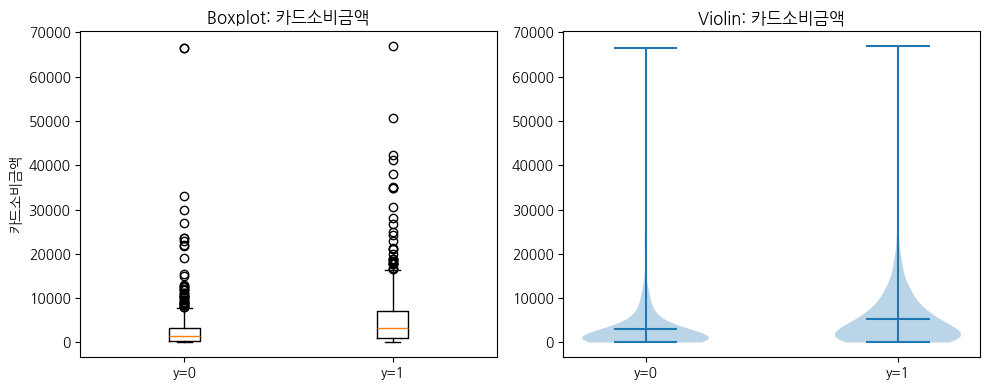

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


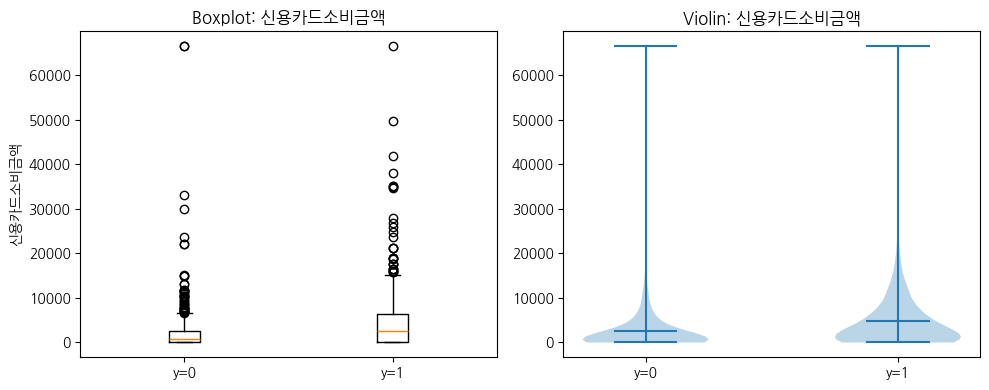

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


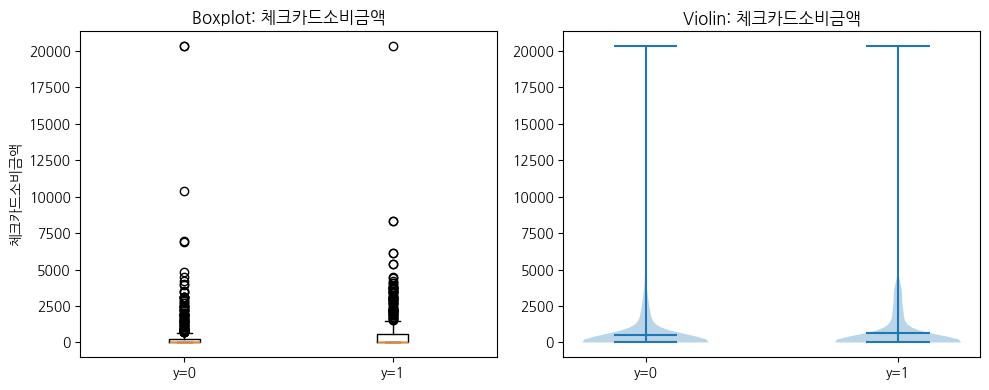

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


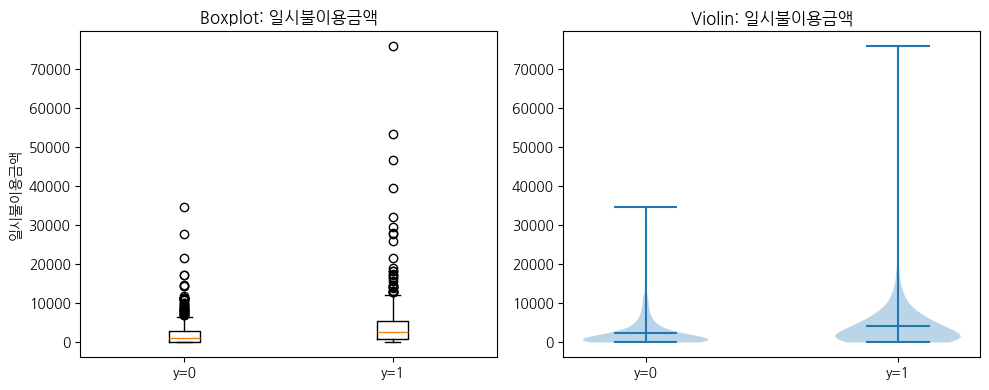

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


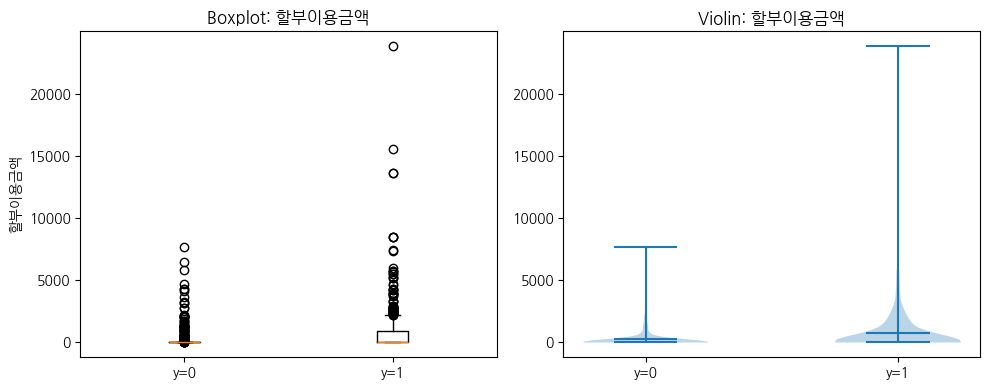

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


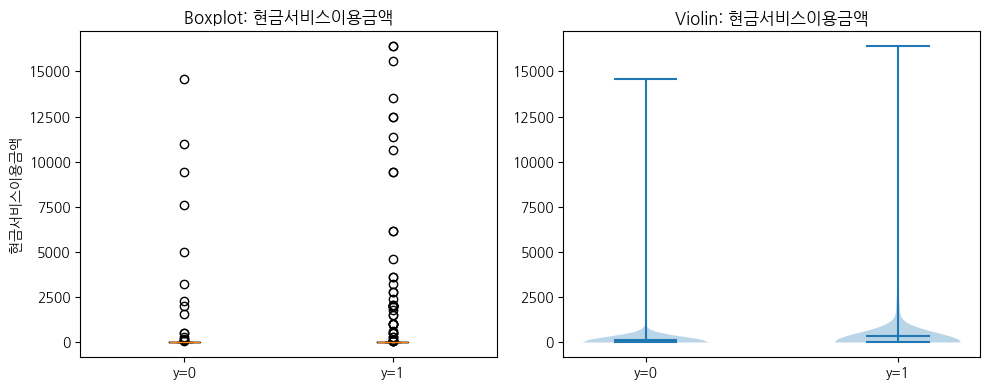

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


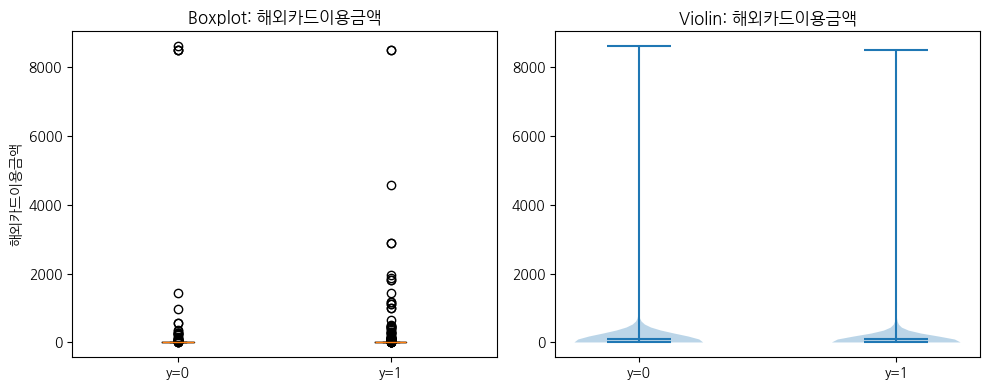

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


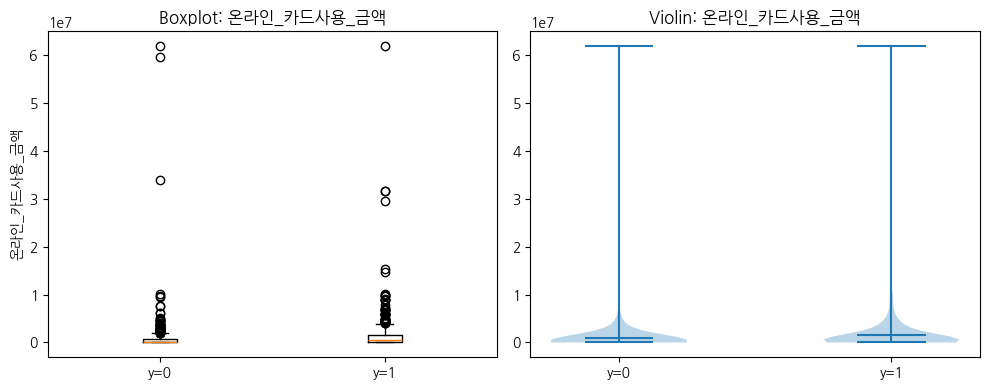

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


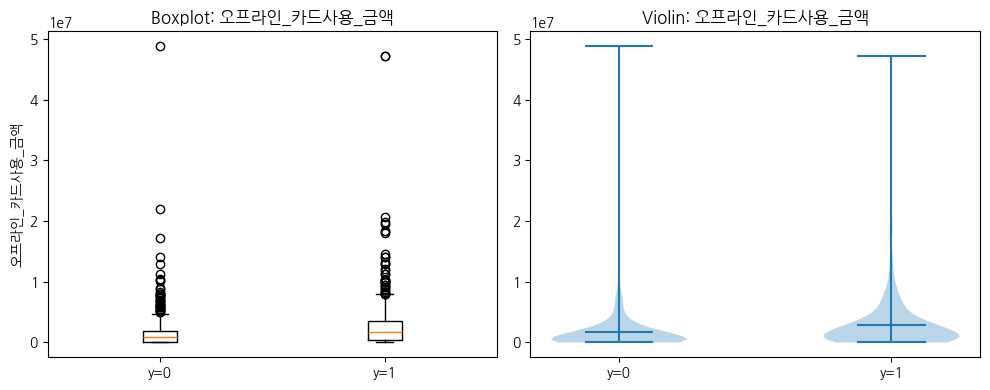

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


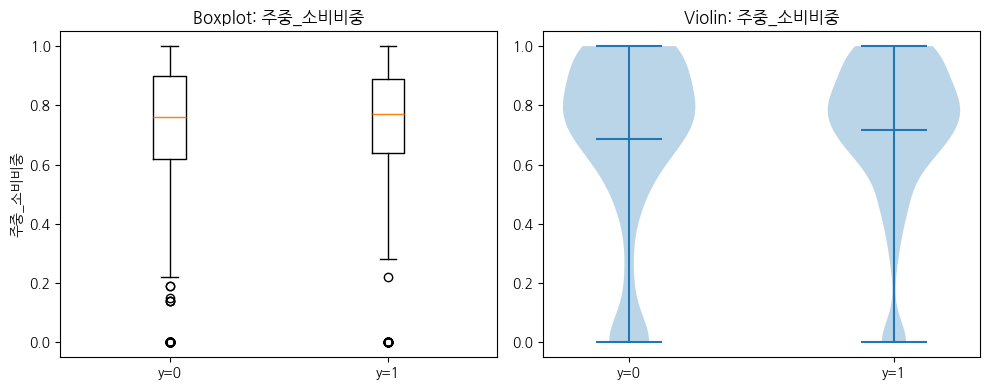

In [34]:
# 개인의 소비 행태를 나타내는 변수 이름들을 묶은 리스트, 대부분 금액 단위 (분포 왜도·이상치 가능성 큼)
cons_cols = [
    "카드소비금액",
    "신용카드소비금액",
    "체크카드소비금액",
    "일시불이용금액",
    "할부이용금액",
    "현금서비스이용금액",
    "해외카드이용금액",
    "온라인_카드사용_금액",
    "오프라인_카드사용_금액",
    "주중_소비비중",
]

for c in cons_cols:   # for 루프: 변수 자동 반복 처리
    if c in df.columns and pd.api.types.is_numeric_dtype(df[c]):  # 안전성 체크 (중요) 컬럼 존재 여부:실제 데이터에 있는 변수만 분석, 숫자형 여부: boxplot / violinplot은 숫자형만 가능
        box_violin_compare(df, "대출여부", c)  # 시각화 함수 호출: 대출자 vs 비대출자 분포 , Boxplot + Violin plot을 순차적으로 출력


- 핵심 분석 포인트
1.  소비 규모 차이 : 대출자가 소비 총액이 더 큰가? ,특정 소비 유형(할부·현금서비스)이 두드러지는가?

2. 소비 구조 차이: 신용 vs 체크 비중 , 온라인 vs 오프라인 차이

3. 리스크 신호 : 현금서비스·할부 소비가 대출자에서 집중되는지? 분포 꼬리가 긴지(고위험 소비자)

4. 머신러닝 관점에서의 의미 : 소비 변수는 행동 기반 피처로 설 결정을 내릴 수 있음
5. 시각화를 통해:로그 변환,캡핑(capping),  변수 선택 결정을 내릴 수 있음

### 5-4. 이동·활동성 지표 비교 (이 데이터의 차별점)

금융 데이터를 “금융 변수만으로” 설명하면 제한적으로 판단가능성 존재  
이 데이터는 이동/활동성 정보가 있으므로 생활 패턴 관점으로 대출 선택을 설명하는 근거를 만들 수 있다. --> 대인신용평가 모델에서 중요한 피쳐 선택


- 이동(모빌리티) 관련 숫자형 변수들을 하나씩 순회하면서, 각 변수에 대해 대출여부(0/1) 기준 분포를 Boxplot + Violin plot으로 비교 시각화하는 EDA 코드
- “사람들의 이동 패턴이 대출 여부와 어떤 관계가 있는가?” 를 체계적으로 분석하는 목적.

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


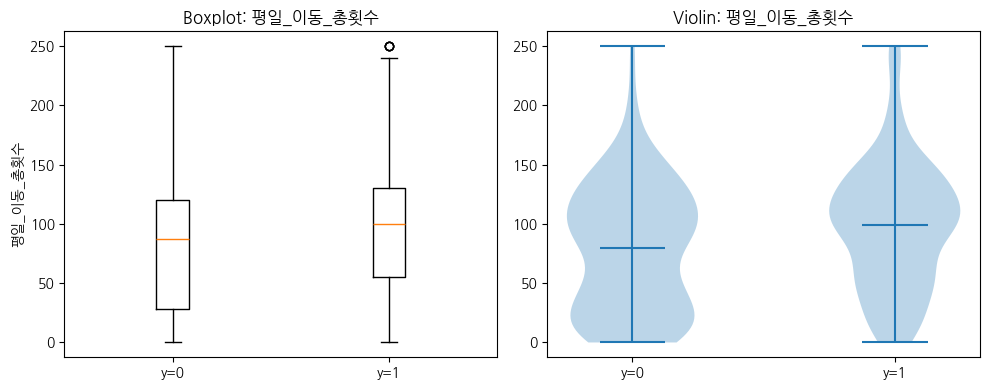

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


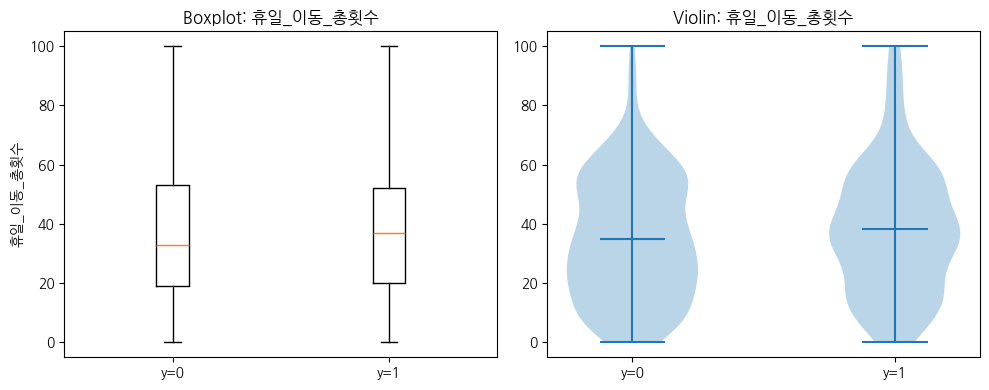

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


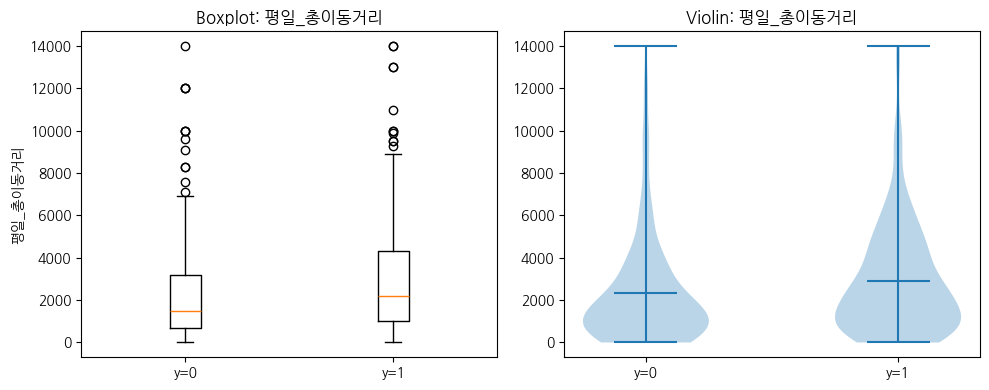

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


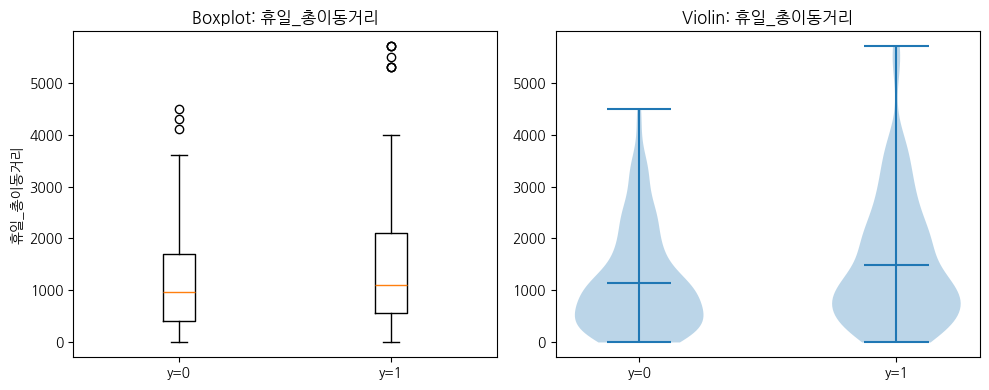

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


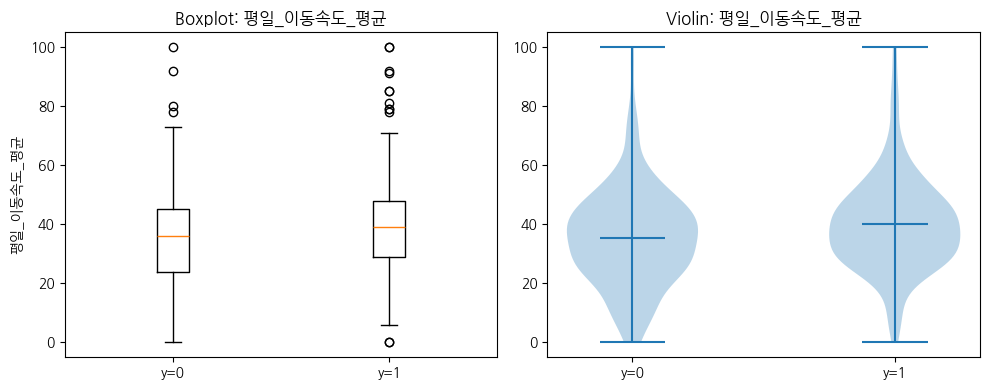

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


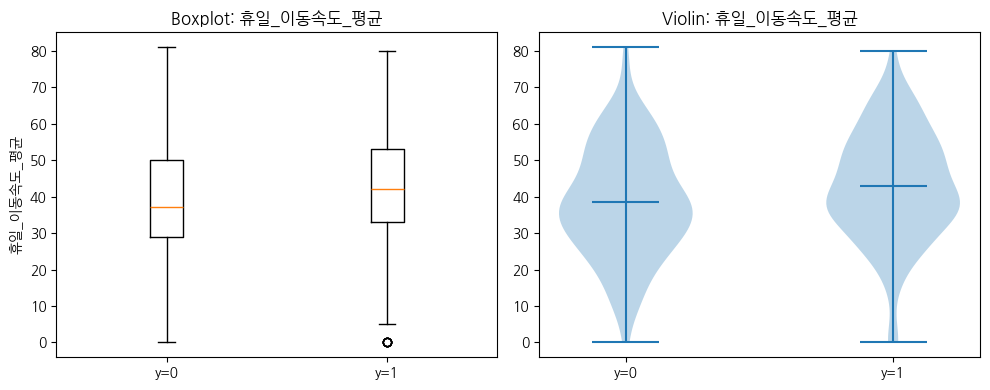

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


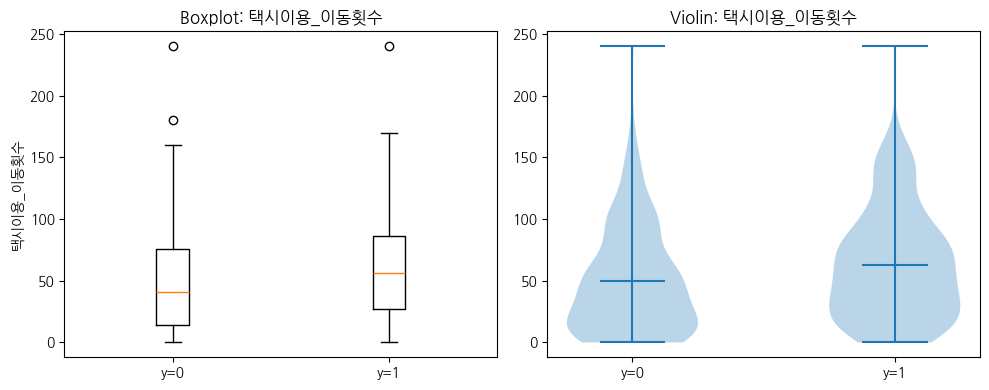

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


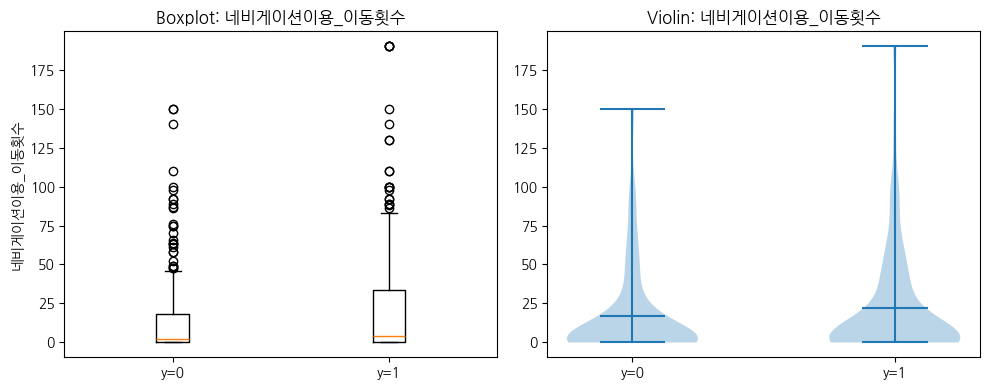

/tmp/ipython-input-1394248814.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0.values, g1.values], labels=["y=0", "y=1"], showfliers=True)


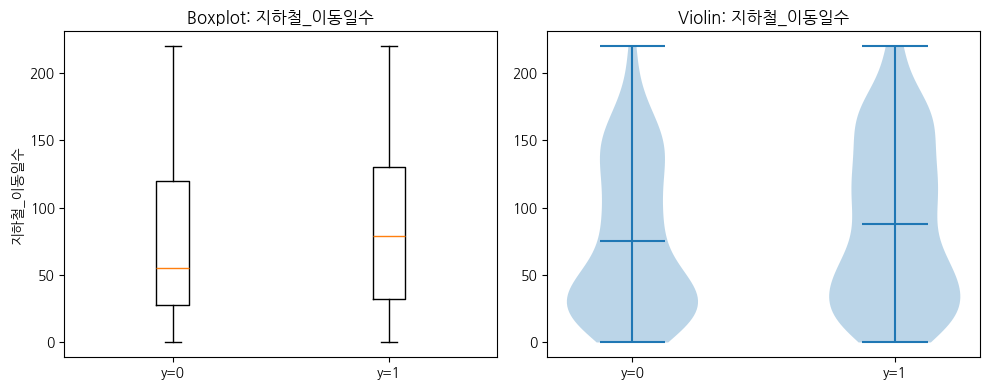

In [35]:
# mob_cols 리스트 : 개인의 이동 패턴을 나타내는 변수들을 묶은 리스트, 모두 숫자형 변수 (횟수·거리·속도·일수)
mob_cols = [
    "평일_이동_총횟수",
    "휴일_이동_총횟수",
    "평일_총이동거리",
    "휴일_총이동거리",
    "평일_이동속도_평균",
    "휴일_이동속도_평균",
    "택시이용_이동횟수",
    "네비게이션이용_이동횟수",
    "지하철_이동일수",
]

for c in mob_cols:  # for 루프: 변수 자동 반복 , 리스트에 있는 이동 변수들을 하나씩 꺼내어 동일한 분석 절차를 자동 반복
    if c in df.columns and pd.api.types.is_numeric_dtype(df[c]):  # 안전성 체크 (에러 방지), 컬럼 존재 여부:데이터셋에 실제로 있는 변수만 사용,  숫자형 여부: boxplot / violinplot은 숫자형만 가능
        box_violin_compare(df, "대출여부", c)  # 시각화 함수 호출,  대출자 vs 비대출자 Boxplot + Violin plot 을 차례로 출력


### 6. “가설 문장” 만들기
EDA의 결과물은 그래프가 아니라 “가설 문장”이다.  
아래 형식으로 3~5개 문장을 남기면,  
21회차(전처리/Feature 설계)의 출발점이 된다.

예시)
- 대출 고객은 ( ) 지표에서 분포가 더 ( )하다.
- 대출 고객은 ( ) 소비 패턴이 더 ( )하다.
- 대출 고객은 ( ) 이동 패턴이 더 ( )하다.


In [36]:
# 평균 차이가 큰 변수 후보를 빠르게 선정하여, 가설 후보군을 만든다.
top_diff_by_mean(df, "대출여부", num_cols, topn=20)


,feature,mean_diff(1-0),mean_y1,mean_y0
72,12개월내_월별_이용금액_최대값,"3,829,217","7,868,613","4,039,396"
33,가맹점합산이용금액,"1,404,062","3,336,862","1,932,800"
62,오프라인_카드사용_금액,"1,146,946","2,831,709","1,684,764"
70,12개월내_월별_이용금액_평균,"1,041,031","2,378,540","1,337,509"
71,12개월내_월별_이용금액_표준편차,"1,027,748","2,090,040","1,062,292"
60,온라인_카드사용_금액,"544,159","1,551,634","1,007,474"
73,12개월내_월별_이용금액_최소값,"339,473","829,128","489,655"
19,총대출약정금액,"166,330","166,330",0
20,주택담보대출약정금액,"97,027","97,027",0
21,신용대출약정금액,"37,731","37,731",0


### 7. 오늘의 결론: 가설 정리
EDA 결과를 바탕으로, 다음 분석(전처리·Feature 설계)로 가져갈 가설을 문장으로 정리한다.

In [37]:
hypotheses = [
    "대출자는 최근 12개월 카드 이용금액(평균/최대)이 더 높다.",
    "대출자는 온라인/오프라인 카드 사용금액이 전반적으로 더 크다.",
    "대출자는 이동 관련 지표의 결측률이 낮아(=관측되는 이동 활동이 많아) 활동성이 더 높을 가능성이 있다.",
]
for i, h in enumerate(hypotheses, 1):
    print(f"{i}. {h}")


1. 대출자는 최근 12개월 카드 이용금액(평균/최대)이 더 높다.
2. 대출자는 온라인/오프라인 카드 사용금액이 전반적으로 더 크다.
3. 대출자는 이동 관련 지표의 결측률이 낮아(=관측되는 이동 활동이 많아) 활동성이 더 높을 가능성이 있다.
